In [1]:
import sys
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cuml.linear_model import LogisticRegression as cuMLLogisticRegression

print('NOVA_HOME is at', os.getenv('NOVA_HOME'))
sys.path.insert(1, os.getenv('NOVA_HOME'))
%load_ext autoreload
%autoreload 2

from utils import *

NOVA_HOME is at /home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA
NOVA_HOME: /home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA


In [2]:
dataset_config = {
    "path_to_embeddings": "/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen",
    "multiplexed": False,
    "config_fmt": "NIH_UMAP1_DatasetConfig_B{batch}",
    "config_dir": "manuscript/manuscript_figures_data_config",
}

Loading all batches...


2025-08-19 14:33:38 INFO: [NIH_UMAP1_DatasetConfig_B1] Init (log path: /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/logs/190825_143338_065474_709400_galavir_sysdashboardsysjupyter.log; JOBID: 709400 Username: galavir) JOBNAME: sysdashboardsysjupyter
2025-08-19 14:33:38 INFO: [NIH_UMAP1_DatasetConfig_B1] NOVA_HOME=/home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA, NOVA_DATA_HOME=/home/projects/hornsteinlab/Collaboration/NOVA/input
2025-08-19 14:33:38 INFO: [load_embeddings] multiplex=False
2025-08-19 14:33:38 INFO: [load_embeddings] experiment_type = NIH
2025-08-19 14:33:38 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-19 14:33:38 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-19 14:33:50 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-19 14

Batches loaded.
Training on Batches: [1], Testing on: [2].

=== Batch [2] ===
Train: (115587, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Test: (94059, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
DAPI_WT_Untreated: 30428
TUJ1_WT_Untreated: 22601
LAMP1_WT_Untreated: 3067
DCP1A_WT_Untreated: 2364
TDP43_WT_Untreated: 2534
P54_WT_Untreated: 2622
SNCA_WT_Untreated: 2454
CLTC_WT_Untreated: 2439
PEX14_WT_Untreated: 2505
PURA_WT_Untreated: 2712
G3BP1_WT_Untreated: 2842
Phalloidin_WT_Untreated: 2219
NEMO_WT_Untreated: 2935
SQSTM1_WT_Untreated: 2651
PML_WT_Untreated: 2297
GM130_WT_Untreated: 2371
Calreticulin_WT_Untreated: 3056
KIF5A_WT_Untreated: 2622
FMRP_WT_Untreated: 2913
NCL_WT_Untreated: 2709
TOMM20_WT_Untreated: 2363
FUS_WT_Untreated: 2728
MitoTracker_WT_Untreated: 2728
TIA1_WT_Untreated: 2712
PSD95_WT_Untreated: 2101
ANAX11_WT_Untreated: 2614
              precision    recall  f1-score   s

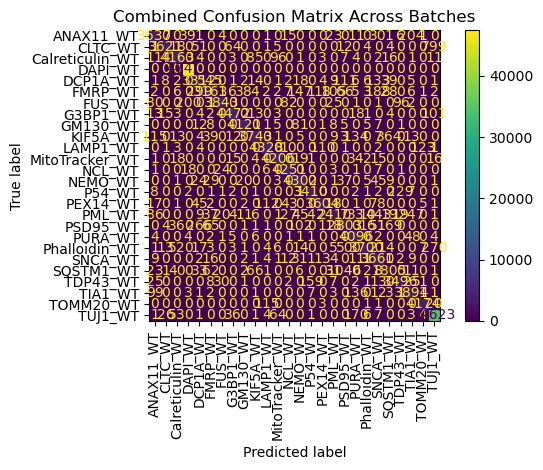


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
      ANAX11_WT_Untreated  0.995397     0.915429     0.997190 0.879565 0.998102
        CLTC_WT_Untreated  0.994310     0.790611     0.999592 0.980504 0.994597
Calreticulin_WT_Untreated  0.997274     0.943777     0.998608 0.944205 0.998597
        DAPI_WT_Untreated  0.998532     1.000000     0.998011 0.994422 1.000000
       DCP1A_WT_Untreated  0.990700     0.784834     0.995609 0.809978 0.994873
        FMRP_WT_Untreated  0.990292     0.771463     0.995358 0.793726 0.994712
         FUS_WT_Untreated  0.996860     0.887324     0.999542 0.979358 0.997247
       G3BP1_WT_Untreated  0.998190     0.961927     0.999145 0.967337 0.998998
       GM130_WT_Untreated  0.998819     0.968508     0.999548 0.980957 0.999243
       KIF5A_WT_Untreated  0.994911     0.838861     0.998851 0.948555 0.995943
       LAMP1_WT_Untreated  0.997202     0.944360     0.998573 0.944978 0.998556
 MitoTracker

In [3]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    train_specific_batches = [1]
)

2025-08-19 14:34:37 INFO: [load_embeddings] multiplex=False
2025-08-19 14:34:37 INFO: [load_embeddings] experiment_type = NIH
2025-08-19 14:34:37 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-19 14:34:37 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen


Loading all batches...


2025-08-19 14:34:39 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-19 14:34:40 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-19 14:34:41 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-19 14:34:41 INFO: [load_embeddings] embeddings shape: (115587, 192)
2025-08-19 14:34:41 INFO: [load_embeddings] labels shape: (115587,)
2025-08-19 14:34:41 INFO: [load_embeddings] example label: DAPI_WT_Untreated
2025-08-19 14:34:41 INFO: [load_embeddings] paths shape: (115587,)
2025-08-19 14:34:41 INFO: [load_embeddings] multiplex=False
2025-08-19 14:34:41 INFO: [load_embeddings] experiment_type = NIH
2025-08-19 14:34:41 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-19 14:34:41 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-19 14:34:43 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08

Batches loaded.
Training on Batches: [2, 3], Testing on: [1].

=== Batch [1] ===
Train: (181189, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Test: (115587, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
DCP1A_WT_Untreated: 4220
SQSTM1_WT_Untreated: 3138
ANAX11_WT_Untreated: 3973
TUJ1_WT_Untreated: 35000
DAPI_WT_Untreated: 47422
Calreticulin_WT_Untreated: 4411
NEMO_WT_Untreated: 4477
SNCA_WT_Untreated: 3780
TOMM20_WT_Untreated: 4314
KIF5A_WT_Untreated: 4462
Phalloidin_WT_Untreated: 4171
PEX14_WT_Untreated: 3929
GM130_WT_Untreated: 4255
MitoTracker_WT_Untreated: 4331
NCL_WT_Untreated: 4312
CLTC_WT_Untreated: 4580
FMRP_WT_Untreated: 4100
PSD95_WT_Untreated: 3534
PML_WT_Untreated: 3441
G3BP1_WT_Untreated: 4649
TDP43_WT_Untreated: 3770
P54_WT_Untreated: 3667
PURA_WT_Untreated: 4175
TIA1_WT_Untreated: 4164
FUS_WT_Untreated: 4331
LAMP1_WT_Untreated: 4583
              precision    recall  f1-score

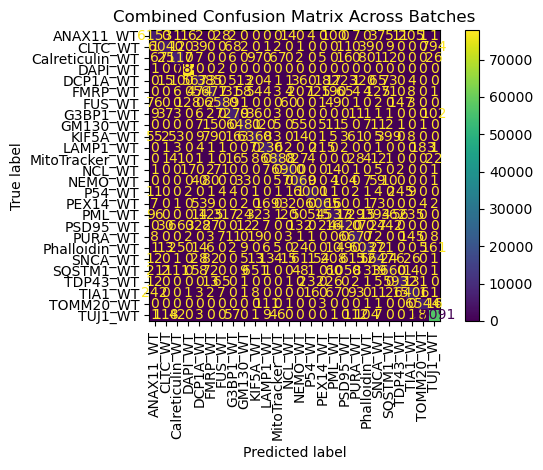


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
      ANAX11_WT_Untreated  0.996651     0.934113     0.998070 0.916580 0.998504
        CLTC_WT_Untreated  0.995879     0.860521     0.999158 0.961171 0.996630
Calreticulin_WT_Untreated  0.997557     0.953127     0.998704 0.949947 0.998790
        DAPI_WT_Untreated  0.999431     0.999961     0.999242 0.997872 0.999986
       DCP1A_WT_Untreated  0.993278     0.861634     0.996265 0.839574 0.996859
        FMRP_WT_Untreated  0.992240     0.809497     0.996663 0.854455 0.995395
         FUS_WT_Untreated  0.997685     0.933418     0.999251 0.968116 0.998379
       G3BP1_WT_Untreated  0.998528     0.971699     0.999222 0.970016 0.999267
       GM130_WT_Untreated  0.998912     0.978117     0.999387 0.973269 0.999500
       KIF5A_WT_Untreated  0.994413     0.898927     0.996748 0.871135 0.997526
       LAMP1_WT_Untreated  0.997409     0.945882     0.998772 0.953234 0.998568
 MitoTracker

In [5]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)